# Analytics and Visualization

By: Mariam Abouzeid

In [2]:
#import needed libraries
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [97]:
#import the cleaned data from the csv file
twitter = pd.read_csv('twitter_archive_master.csv')

In [115]:
#data description
twitter.describe()

,tweet_id,rating_numerator,rating_denominator,favorites,retweets,user_followers,confidence_level
count,1.980000e+03,1980.000000,1980.0,1980.000000,1980.000000,1.980000e+03,1980.000000
mean,7.359565e+17,11.698485,10.0,8913.546465,2740.732323,6.629520e+06,0.464171
std,6.760256e+16,40.810033,0.0,12642.627649,4728.125522,1.695281e+02,0.339432
min,6.660209e+17,0.000000,10.0,80.000000,13.000000,6.629057e+06,0.000000
25%,6.757942e+17,10.000000,10.0,1918.250000,608.750000,6.629344e+06,0.140107
50%,7.084132e+17,11.000000,10.0,4065.500000,1317.000000,6.629536e+06,0.457514
75%,7.880674e+17,12.000000,10.0,11202.250000,3153.250000,6.629660e+06,0.775076
max,8.924206e+17,1776.000000,10.0,143885.000000,77689.000000,6.629803e+06,0.999956


## Correlation Matrix

We use the correlation matrix to know how strong they are related to each other

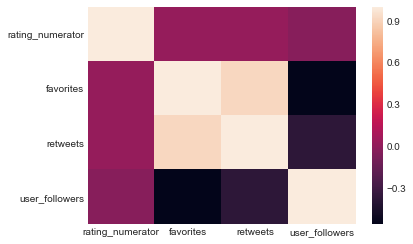

In [99]:
#correlation matrix using seaborn library
corr = twitter[['rating_numerator', 'favorites', 'retweets', 'user_followers']].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

- we can see the strong correlation between favorites and retweet, this is normal (more favorites mean more retweets)
- user followers and retweet have negative correlation (this seems the opposite of normal prediction)
- rating doesnt get affected by any attribute

## Plotting and Analysis

in this part, we will dig more into the relation between the attributed and each other. Also we want to see the differences over time

#### Retweets VS Favorites

Text(0.5, 1.0, 'Retweets and favorites plot')

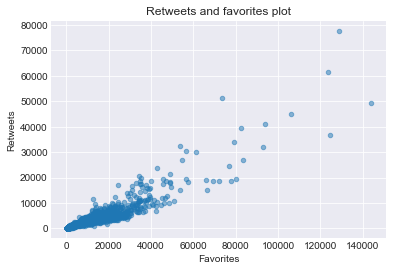

In [104]:
twitter.plot(kind='scatter',x='favorites',y='retweets', alpha = 0.5)
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites plot')

As we've seen in the matric, there is high correlation between these 2 variables. More favorites more retweets

#### Retweets and Favorites across the years

In [101]:
#adjust timestamp datatype and index
twitter['timestamp'] = pd.to_datetime(twitter.timestamp)
twitter.set_index('timestamp', inplace=True)

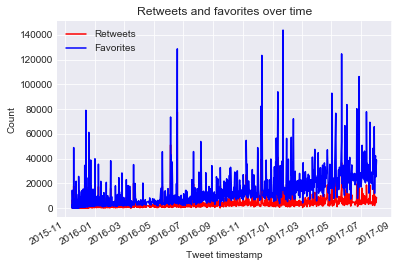

In [102]:
#histogram for both retweets and favorites over time
twitter['retweets'].plot(color = 'red', label='Retweets')
twitter['favorites'].plot(color = 'blue', label='Favorites')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.savefig('retweets_favorites.png')
plt.show()

- we can see that favorites number is much higher than retweets across the years
- retweets are slightly increasing across time

#### Rating across the years

Text(0, 0.5, 'Rating')

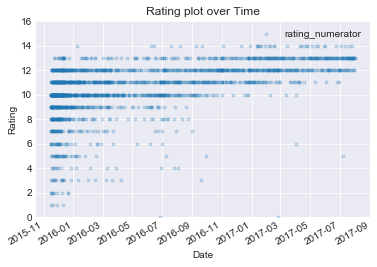

In [103]:
#histogram for rating across the years
twitter.plot(y ='rating_numerator', ylim=[0,16], style = '.', alpha = .2)
plt.title('Rating plot over Time')
plt.xlabel('Date')
plt.ylabel('Rating')

- the useres were not used to rating for the past years but over time they started using it more and more frequently

#### Dog Stages Pie Chart

(-1.288268191449591,
 1.2310305760057396,
 -1.2401381220397572,
 1.2110819987279693)

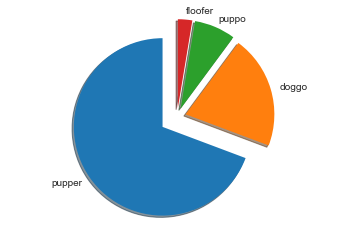

In [112]:
dog_stage_count = list(twitter[twitter['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
dog_stages = twitter[twitter['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
ax1.axis('equal')

- pupper is the most owned doge stage, followed by doggo. foofer is the least owned one

#### Dog Gender Pie Chart

(-1.2738839107532767,
 1.18583913202791,
 -1.2704479706170846,
 1.1814100007224537)

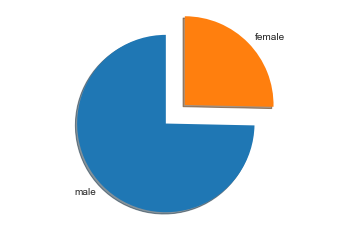

In [118]:
dog_gender_count = list(twitter[twitter['dog_gender'] != 'None']['dog_gender'].value_counts())[0:2]
dog_gender = twitter[twitter['dog_gender'] != 'None']['dog_gender'].value_counts().index.tolist()[0:2]
explode = (0.2, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_gender_count, explode = explode, labels = dog_gender, shadow = True, startangle = 90)
ax1.axis('equal')

- almost 3/4 of the dogs are males while only 1/4 are females